In [56]:
import numpy as np
import matplotlib.pyplot as plt

In [57]:
#Exercice 1 : 
def EulerExplicite(f,a,b,y0,n):
    h = (b-a)/n
    T = np.linspace(a,b,n+1)
    Y = np.zeros(n+1)
    Y[0] = y0
    for k in range(n):
        Y[k+1] = Y[k] + h * f(T[k],Y[k])
    return Y,T

def Heun(f,a,b,y0,n):
    h = (b-a)/n
    T = np.linspace(a,b,n+1)
    Y = np.zeros(n+1)
    Y[0] = y0
    for k in range(n):
        k1 = Y[k] + h*f(T[k],Y[k])
        Y[k+1] = Y[k] + h/2*( f(T[k],Y[k]) + f(T[k+1],k1) )
    return Y,T

def RK4(f,a,b,y0,n):
    h = (b-a)/n
    Y = np.zeros(n+1)
    T = np.linspace(a,b,n+1)
    Y[0] = y0
    for k in range(n):
        k1 = f(T[k],Y[k])
        k2 = f(T[k] + 1/2*h, Y[k] + 1/2*h*k1)
        k3 = f(T[k] + 1/2*h, Y[k] + 1/2*h*k2)
        k4 = f(T[k] + h, Y[k] + h*k3)
        Y[k+1] = Y[k]+ (h/6)*(k1+ 2*k2 + 2*k3 + k4)
    return Y,T

    

In [58]:
#Exercice 2:
def newton(f,g,a,n): #g = f'
    for i in range(n):
        a = a - f(a)/g(a)
    return a

def EulerImplicite(f,g,a,b,y0,n):
    h = (b-a)/n
    Y = np.zeros(n+1)
    T = np.linspace(a,b,n+1)
    Y[0] = y0
    for k in range(n):
        Y[k+1] = newton(lambda x:Y[k]+h*f(T[k+1],x)-x, lambda x:h*g(T[k+1],x)-1,Y[k],10)
    return Y,T

def CranckNicholson(f,g,a,b,y0,n):
    h = (b-a)/n
    Y = np.zeros(n+1)
    T = np.linspace(a,b,n+1)
    Y[0] = y0
    for k in range(n):
        Y[k+1] = newton(lambda x:Y[k] + (h/2)*( f(T[k],Y[k]) + f(T[k+1],x))-x,lambda x:(h/2)*g(T[k+1],x)-1,Y[k],10)
    return Y,T

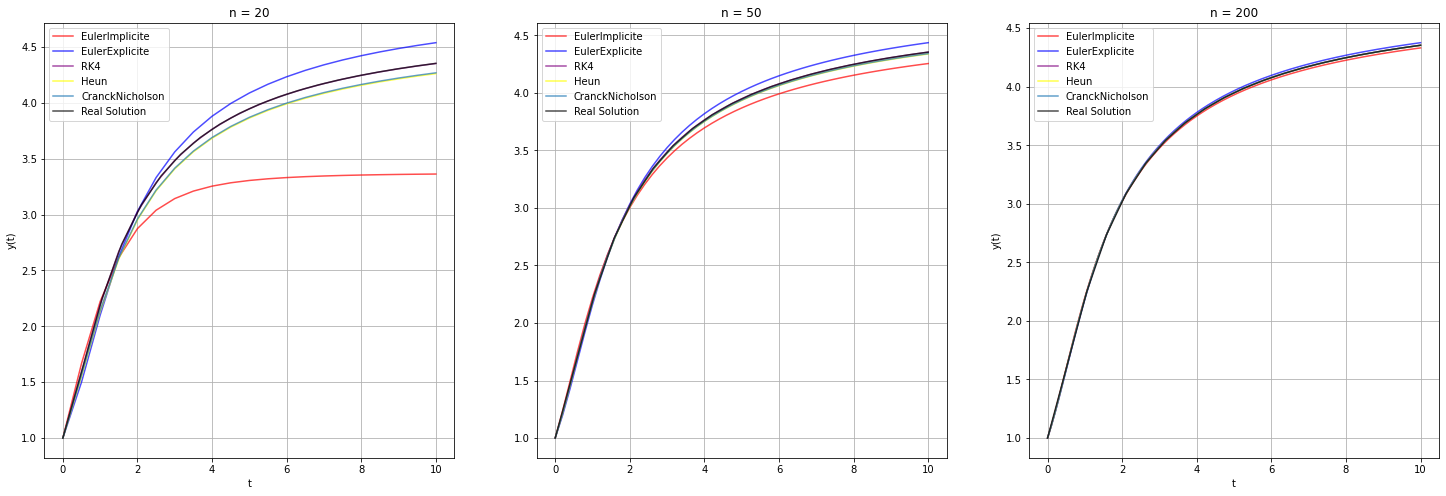

In [70]:
#Exercice 3:
a = 0; b = 10; y0 = 1; n=20; X = np.linspace(a,b,n)
def f(t,y):
    return y/(1+t**2)
def g(t,y): #derive de f par rapport à y
    return 1/(1**2)
def sol(t):
    return np.exp(np.arctan(t))
def plot_method(method,parameters,color="undefined"):
    sol, x1 = method(*parameters)
    if color == "undefined":
        plt.plot(x1,sol,label = method.__name__,alpha=0.7)
    else:
        plt.plot(x1,sol,label = method.__name__,color=color,alpha=0.7)

fig = plt.figure()
fig.set_size_inches(25,8)
plt.subplot(1, 3, 1)
plt.gca().set_title("n = " + str(n))
plt.grid()
plot_method(EulerImplicite,(f,g,a,b,y0,n),color="red")
plot_method(EulerExplicite,(f,a,b,y0,n),color="blue")
plot_method(RK4,(f,a,b,y0,n),color="purple")
plot_method(Heun,(f,a,b,y0,n),color="yellow")
plot_method(CranckNicholson,(f,g,a,b,y0,n))
plt.plot(X,sol(X),label = "Real Solution",alpha=0.7,color="black")
plt.xlabel("t") ; plt.ylabel("y(t)")
plt.legend()
n=50
plt.subplot(1, 3, 2)
plt.grid()
plt.gca().set_title("n = " + str(n))
plot_method(EulerImplicite,(f,g,a,b,y0,n),color="red")
plot_method(EulerExplicite,(f,a,b,y0,n),color="blue")
plot_method(RK4,(f,a,b,y0,n),color="purple")
plot_method(Heun,(f,a,b,y0,n),color="yellow")
plot_method(CranckNicholson,(f,g,a,b,y0,n))
plt.plot(X,sol(X),label = "Real Solution",alpha=0.7,color="black")
plt.legend()
n=200
plt.subplot(1,3,3)
plt.gca().set_title("n = " + str(n))
plot_method(EulerImplicite,(f,g,a,b,y0,n),color="red")
plot_method(EulerExplicite,(f,a,b,y0,n),color="blue")
plot_method(RK4,(f,a,b,y0,n),color="purple")
plot_method(Heun,(f,a,b,y0,n),color="yellow")
plot_method(CranckNicholson,(f,g,a,b,y0,n))
plt.plot(X,sol(X),label = "Real Solution",alpha=0.7,color="black")
plt.xlabel("t") ; plt.ylabel("y(t)")
plt.grid()
plt.legend()
plt.show()
